<a href="https://colab.research.google.com/github/JeanAlvesR/DataScienceSamsung/blob/master/dataset_samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import necessary libraries**


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import os
import warnings
import kagglehub
import os
import math

## **2. Import dataset**

### 2.1 Download Base


In [3]:


path = kagglehub.dataset_download("datatechexplorer/samsung-mobile-sales-dataset")

print("Path to dataset files:", path)

100%|██████████| 24.3k/24.3k [00:00<00:00, 28.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/datatechexplorer/samsung-mobile-sales-dataset/versions/1


### 2.2 Import do .csv com o PANDAS

In [4]:
df = pd.read_csv(os.path.join(path, "Expanded_Dataset.csv"))

## 3. **General View of Imported Data**

### 3.1 First 5 Records

In [5]:
df.head()


,Year,Quarter,Product Model,5G Capability,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%),Region
0,2019,Q1,Galaxy S10,No,26396,4.212951e+06,1.04,57.36,39.55,293.10,55.87,Asia-Pacific
1,2019,Q1,Galaxy Note10,No,25671,7.240266e+06,2.82,85.80,42.58,67.46,37.26,Latin America
2,2019,Q1,Galaxy S20,No,16573,2.560833e+07,-0.03,47.02,3.78,77.25,84.66,Middle East & Africa
3,2019,Q1,Galaxy Note20,No,7177,2.198442e+07,0.84,25.70,23.41,105.27,40.03,North America
4,2019,Q1,Galaxy S21,No,45633,1.634244e+07,2.36,89.13,44.43,206.17,76.88,Latin America


###3.2 Last 5 Records

In [6]:
df.tail()

,Year,Quarter,Product Model,5G Capability,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%),Region
995,2023,Q4,Galaxy S22 5G,Yes,36216,2.995937e+07,3.82,70.59,46.92,177.43,63.86,Latin America
996,2022,Q2,Galaxy S21,No,33806,2.369938e+07,-0.23,77.31,47.51,129.70,78.41,North America
997,2022,Q1,Galaxy S10,No,23678,2.330203e+07,0.58,45.61,43.79,156.56,72.06,Europe
998,2023,Q4,Galaxy Note10,No,35697,1.946256e+07,2.49,36.55,36.44,236.39,47.11,North America
999,2020,Q4,Galaxy Note20,No,7473,1.962177e+07,3.88,74.66,27.55,177.22,72.36,North America


###3.3 Table structure information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1000 non-null   int64  
 1   Quarter                    1000 non-null   object 
 2   Product Model              1000 non-null   object 
 3   5G Capability              1000 non-null   object 
 4   Units Sold                 1000 non-null   int64  
 5   Revenue ($)                1000 non-null   float64
 6   Market Share (%)           1000 non-null   float64
 7   Regional 5G Coverage (%)   1000 non-null   float64
 8   5G Subscribers (millions)  1000 non-null   float64
 9   Avg 5G Speed (Mbps)        1000 non-null   float64
 10  Preference for 5G (%)      1000 non-null   float64
 11  Region                     1000 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 93.9+ KB


### 3.4 Simple table calculations

In [8]:
df.describe()

,Year,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%)
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2021.456000,32842.990000,3.019733e+07,3.723570,66.889720,30.152080,179.225560,67.14291
std,1.700281,16039.770572,1.837941e+07,1.991108,19.254095,14.537781,70.470934,15.75925
min,2019.000000,5309.000000,2.987436e+06,-0.490000,25.340000,-0.890000,50.370000,37.14000
25%,2020.000000,19327.250000,1.460749e+07,2.635000,50.400000,18.412500,120.410000,53.26750
50%,2021.000000,33689.000000,2.801200e+07,3.760000,67.050000,29.915000,177.390000,66.96000
75%,2023.000000,43911.000000,4.180391e+07,5.282500,83.210000,44.360000,238.860000,80.99000
max,2024.000000,64883.000000,8.426494e+07,6.950000,103.920000,54.940000,298.700000,94.84000


### 3.5 Check for any null values in the table

In [9]:
## df.isnull() returns the same table replacing the value with true or false,
## if true, it means the field is null
## .sum() returns the columns grouped with their sum.
## .any() checks if there is any null in the sum result
df.isnull().sum().any()

np.False_

## **4. Cardinality of Categorical Attributes**

### 4.0 info

Cardinality: It is the number of unique distinct values that a categorical column has. For example:

The "Quarter" column has 4 possible values: "Q1", "Q2", "Q3", "Q4".

The "5G Capability" column has only 2: "Yes" or "No".

### 4.1 Attribute Category Detection

In [10]:
##Descriptive type columns
object_type_columns = [col for col in df.columns if df[col].dtype == "object"]
object_type_columns

['Quarter', 'Product Model', '5G Capability', 'Region']

In [11]:
# Calculates the number of different items
cardinality = {col: df[col].nunique() for col in object_type_columns}
cardinality

# test = {col: df.groupby(col).size() for col in object_type_columns}
# test['Product Model']

{'Quarter': 4, 'Product Model': 15, '5G Capability': 2, 'Region': 5}

In [12]:
##More beautiful visualization
cardinality_df = pd.DataFrame(list(cardinality.items()), columns=['Column', 'Cardinality'])
cardinality_df

,Column,Cardinality
0,Quarter,4
1,Product Model,15
2,5G Capability,2
3,Region,5


<Axes: xlabel='Column', ylabel='Cardinality'>

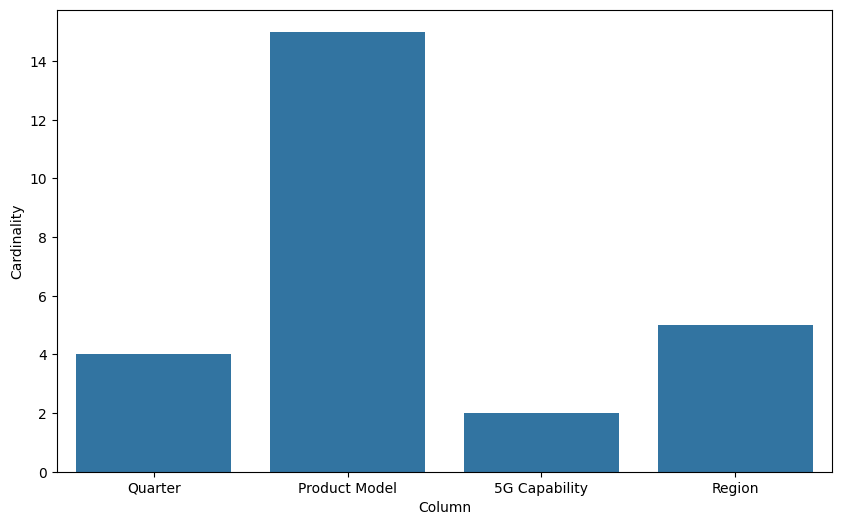

In [13]:
#Visualization of cardinality using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=cardinality_df['Column'], y=cardinality_df['Cardinality'])

## 5 Frequency of attributes

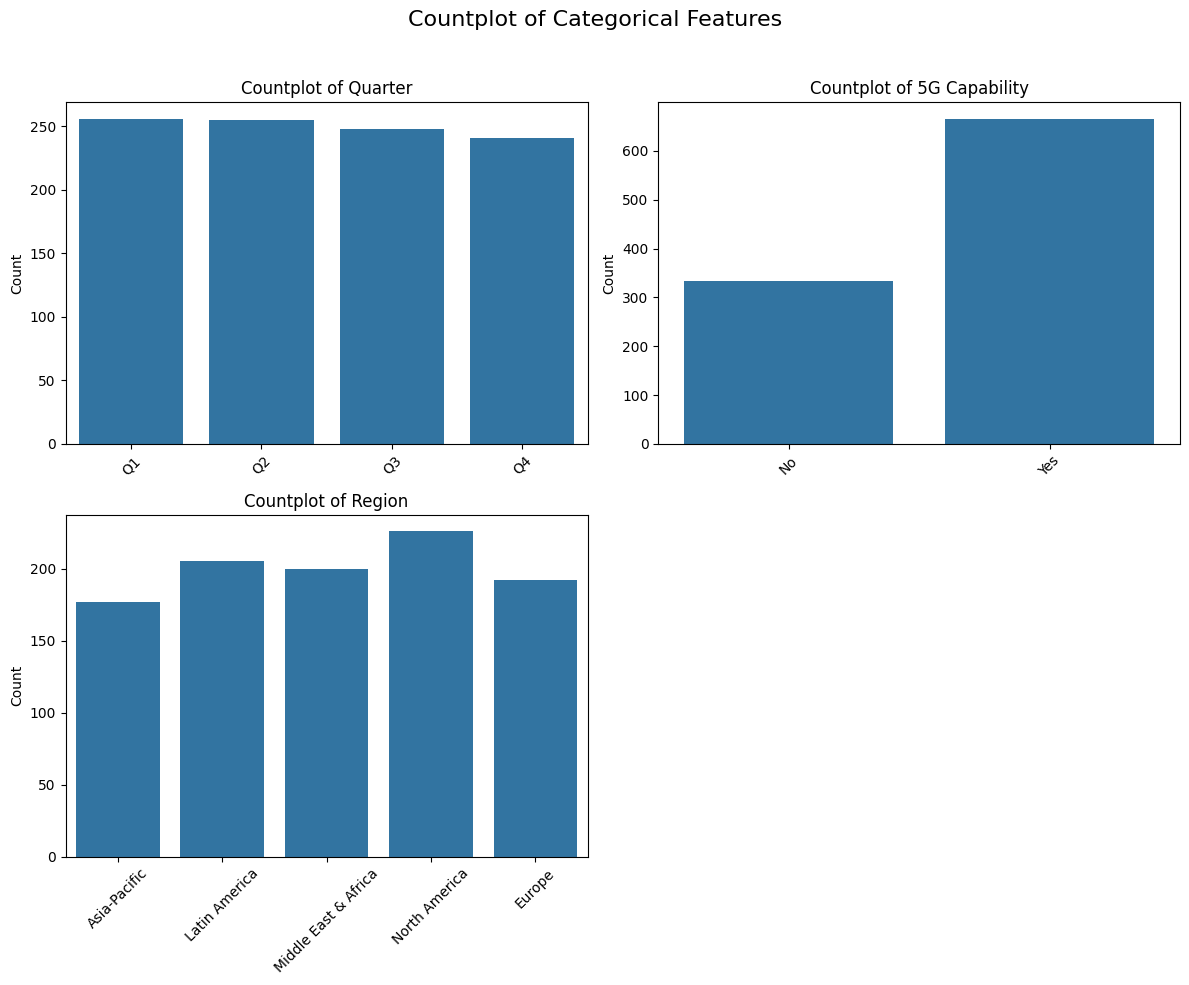

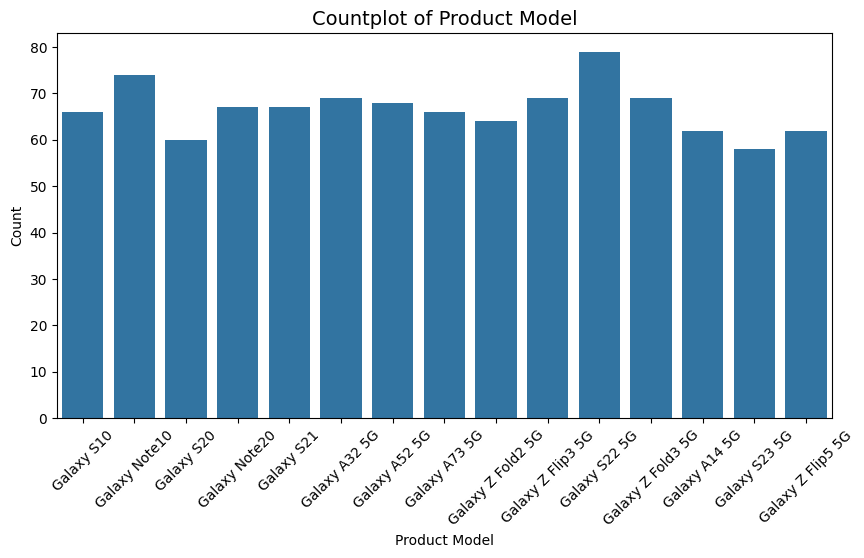

In [14]:
# Countplot visualization for categorical variables
LOW_CARDINALITY_LIMIT = 10
high_cardinality_column = next((col for col in object_type_columns if df[col].nunique() > LOW_CARDINALITY_LIMIT), None)
low_cardinality_columns = [col for col in object_type_columns if col != high_cardinality_column]

# Create subplots for low cardinality categorical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Countplot of Categorical Features", fontsize=16)
axes = axes.flatten()

for i, col in enumerate(low_cardinality_columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Countplot of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide the subplots that were not filled
for j in range(len(low_cardinality_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

if high_cardinality_column:
  plt.figure(figsize=(10, 5))
  sns.countplot(x=df[high_cardinality_column])
  plt.title(f"Countplot of {high_cardinality_column}", fontsize=14)
  plt.xlabel(high_cardinality_column)
  plt.ylabel("Count")
  plt.xticks(rotation=45)
  plt.show()

## 6. Distribution of Units Sold

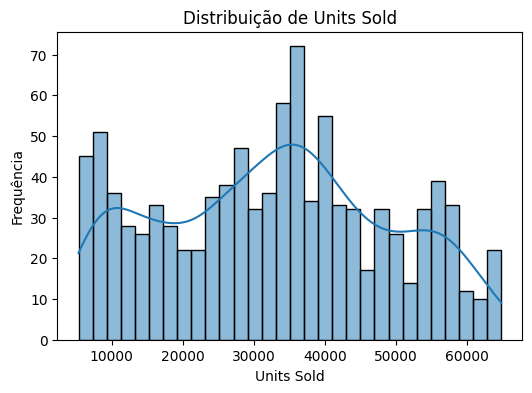

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df["Units Sold"], bins=30, kde=True)
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequência")
plt.show()